# Project Title
## Participants:
### Data Source



In [2]:
# Heart disease project

In [3]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from pathlib import Path

In [4]:
#Import csv file

heart_disease_path = Path("heart.csv")
heart_disease_df = pd.read_csv(heart_disease_path)
heart_disease_df.head()

# -- We can remove this latter, I wanted to be able to quickly check what is in which column to make work easier ;) ---

#[age] = age 
#[sex] = sex (1 = male; 0 = female)
#[cp]  =  chest pain type (4 values) 
#[trestbps] = resting blood pressure 
#[chol] = serum cholestoral in mg/dl  
#[fbs] = fasting blood sugar > 120 mg/dl  
#[restecg] = resting electrocardiographic results (values 0,1,2)
#[thalach] = maximum heart rate achieved 
#[exang] = exercise induced angina 
#[oldpeak] = oldpeak = ST depression induced by exercise relative to rest
#[slope] = the slope of the peak exercise ST segment
#[ca] = number of major vessels (0-3) colored by flourosopy 
#[thal] = thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
#[target] = The presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Number of women: 312
Number of men: 713
Number of women with heart disease: 226
Number of men with heart disease: 300


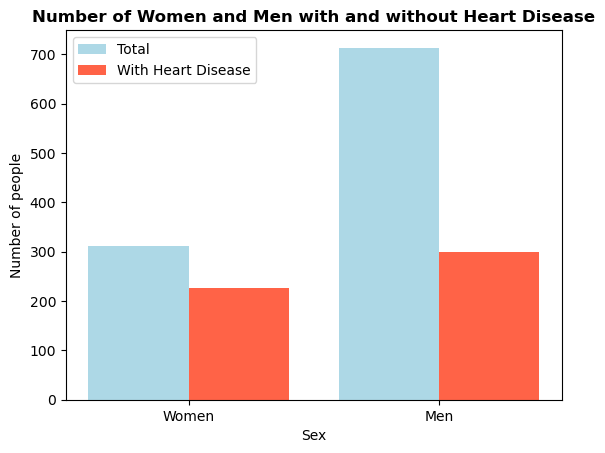

NameError: name 'total_women' is not defined

In [5]:
#Hypothesis#1
#Men are most likely to develop heart disease than women (0 is the no disease, 1 = disease)
#Bar chart (Target vs gender), pie chart

counts = heart_disease_df['sex'].value_counts()
all_women = counts.get(0, 0)  
print(f"Number of women: {all_women}")

counts = heart_disease_df['sex'].value_counts()
all_men = counts.get(1, 0)
print(f"Number of men: {all_men}")

filter_df = heart_disease_df[heart_disease_df['sex'] == 0 ]
count_ill_women = (filter_df['target'] == 1).sum()
print(f"Number of women with heart disease: {count_ill_women}")

filtered_df = heart_disease_df[heart_disease_df['sex'] == 1 ]
count_ill_men = (filtered_df['target'] == 1).sum()
print(f"Number of men with heart disease: {count_ill_men}")


#------------------------------ Bar Chart: -------------------------------
categories = ['Women', 'Men']
total_counts = [all_women, all_men]
ill_counts = [count_ill_women, count_ill_men]

x = range(len(categories))

plt.bar(x, total_counts, width=0.4, label='Total', color='lightblue', align='center')
plt.bar([p + 0.4 for p in x], ill_counts, width=0.4, label='With Heart Disease', color='tomato', align='center')

plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.title('Number of Women and Men with and without Heart Disease', fontweight='bold')
plt.xticks([p + 0.2 for p in x], categories)
plt.legend()


plt.show()

#----------------------------- Pie Charts: -------------------------


ill_women = heart_disease_df[(heart_disease_df['sex'] == 0) & (heart_disease_df['target'] == 1)].shape[0]
healthy_women = total_women - ill_women

ill_men = heart_disease_df[(heart_disease_df['sex'] == 1) & (heart_disease_df['target'] == 1)].shape[0]
healthy_men = total_men - ill_men

plt.figure(figsize=(12, 6)) 

labels_women = ['Women with heart disease', 'Healthy Women']
sizes_women = [ill_women, healthy_women]
colors_women = ['tomato', 'lightblue']


plt.subplot(1, 2, 1)
plt.pie(sizes_women, labels=labels_women, colors=colors_women, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sick and Healthy Women', fontweight='bold')

labels_men = ['Men with heart disease', 'Healthy Men']
sizes_men = [ill_men, healthy_men]
colors_men = ['tomato', 'lightblue']


plt.subplot(1, 2, 2)
plt.pie(sizes_men, labels=labels_men, colors=colors_men, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sick and Healthy Men', fontweight='bold')

plt.tight_layout()

plt.show()



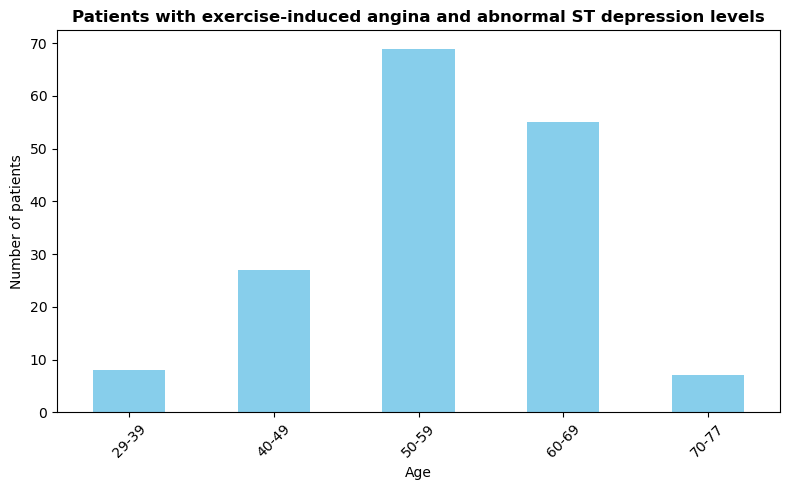

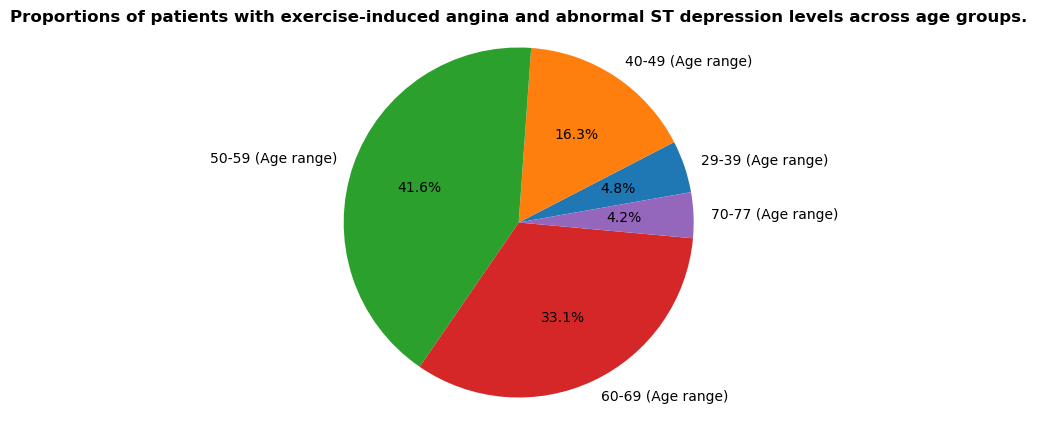

In [91]:
#Hypothesis#2 
#Older patients are more likely to have exercise-induced angina and abnormal ST depression levels.
#Bins to divide age into 5 groups: 29-39, 40-49. 50-69, 60-69, 70-77

#"Measurement. ST segment depression may be determined by measuring the vertical distance between the patient's
#trace and the isoelectric line at a location 2-3 millimeters from the QRS complex. It is significant if it 
#is more than 1 mm in V5-V6, or 1.5 mm in AVF or III."-> from https://en.wikipedia.org/wiki/ST_depression#:~:text=the%20ECG%20paper.-,Measurement,mm%20in%20AVF%20or%20III.

bins = [29, 39, 49, 59, 69, 77]
labels = ['29-39', '40-49', '50-59', '60-69', '70-77']
heart_disease_df['age_group'] = pd.cut(heart_disease_df['age'], bins=bins, labels=labels, right=True)


filt_df = heart_disease_df[(heart_disease_df['exang'] == 1) & (heart_disease_df['oldpeak'] > 1.5)]
double_diagnosis_result = filt_df.groupby('age_group', observed=False).size()

double_diagnosis_result

#--------------------------- BarChart -------------------------------

plt.figure(figsize=(8, 5))
double_diagnosis_result.plot(kind='bar', color='skyblue')

plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Patients with exercise-induced angina and abnormal ST depression levels', fontweight='bold')

plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

#---------------------------Pie Chart -------------------------------

sorted_result = double_diagnosis_result.sort_index()
labels = [f'{label} (Age range)' for label in sorted_result.index]

plt.figure(figsize=(8, 5))
plt.pie(sorted_result, labels=labels, autopct='%1.1f%%', startangle=10)
plt.title('Proportions of patients with exercise-induced angina and abnormal ST depression levels across age groups.', fontweight='bold')
plt.axis('equal')
plt.show()


Number of patients with fasting blood sugar > 120 mg/dl: 153
Number of patients with fasting blood sugar > 120 mg/dl and heart disease: 71
Number of patients with fasting blood sugar <= 120 mg/dl: 872
Number of patients with fasting blood sugar <= 120 mg/dl and heart disease: 455


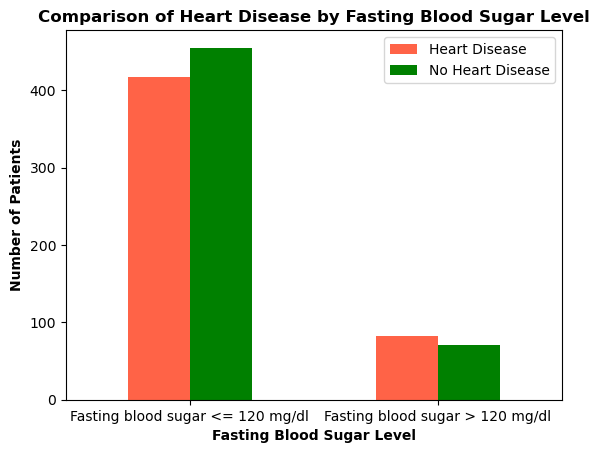

In [120]:
#Hypothesis#3 
#Patients with fasting blood sugar > 120 mg/dl are more likely to have heart disease

#--------- Checking patients with high sugar: -------------

high_sugar = heart_disease_df[heart_disease_df['fbs'] == 1 ]

total_high_sugar_patients = high_sugar.shape[0]
print(f"Number of patients with fasting blood sugar > 120 mg/dl: {total_high_sugar_patients}")

high_sugar_sick = (high_sugar['target'] == 1).sum()
high_sugar_healthy = (high_sugar['target'] == 0).sum()

print(f"Number of patients with fasting blood sugar > 120 mg/dl and heart disease: {high_sugar_sick}")

#--------- Checking control group: ------------

low_sugar = heart_disease_df[heart_disease_df['fbs'] == 0 ]

total_low_sugar_patients = low_sugar.shape[0]
print(f"Number of patients with fasting blood sugar <= 120 mg/dl: {total_low_sugar_patients}")

low_sugar_sick = (low_sugar['target'] == 1).sum()
low_sugar_healthy = (low_sugar['target'] == 0).sum()

print(f"Number of patients with fasting blood sugar <= 120 mg/dl and heart disease: {low_sugar_sick}")

#------------Chart bar ---------------------

summary = heart_disease_df.groupby(['fbs', 'target']).size().unstack(fill_value=0)

summary.plot(kind='bar', stacked=False, color=['tomato', 'green'])
plt.xlabel('Fasting Blood Sugar Level', fontweight='bold')
plt.ylabel('Number of Patients', fontweight='bold')
plt.title('Comparison of Heart Disease by Fasting Blood Sugar Level', fontweight='bold')
plt.xticks(ticks=[0, 1], labels=['Fasting blood sugar <= 120 mg/dl', 'Fasting blood sugar > 120 mg/dl'], rotation=0)
plt.legend(['Heart Disease', 'No Heart Disease'])
plt.show()

#-------------



Hypothesis 4 (DANIEL ALLEN):
The interaction between age, maximum heart rate achieved during exercise, and exercise-induced angina, along with the number of major vessels affected, significantly predicts the likelihood of chest pain (angina) in patients.

1. 3D Surface Plot:

A 3D plot (e.g., age vs. thalach vs. probability of chest pain) to visually capture the interaction effect of age and thalach on the probability of chest pain.

2. Heatmap:

A heatmap showing the combined influence of exercise-induced angina (exang) and number of major vessels (ca) on the probability of chest pain would provide a more detailed view of the interaction effect.

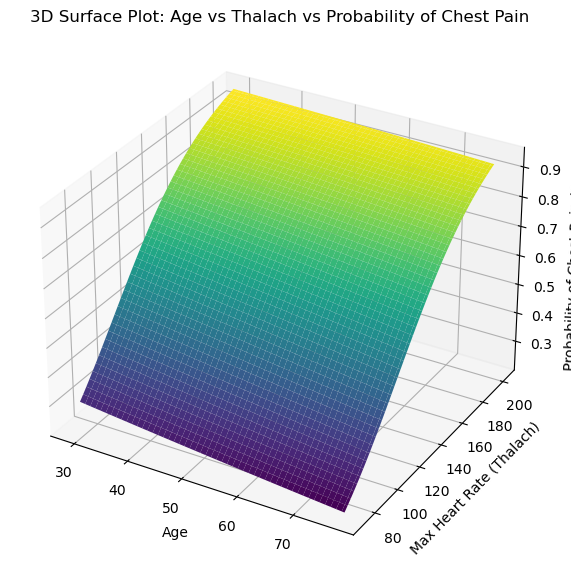

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv(r"C:\Users\board\Project-1\Heart Disease Dataset.csv")

# Define variables
X = data[['age', 'thalach', 'exang', 'ca']]
y = data['target']

# Fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Create a grid of age and thalach values
age_vals = np.linspace(X['age'].min(), X['age'].max(), 100)
thalach_vals = np.linspace(X['thalach'].min(), X['thalach'].max(), 100)
age_grid, thalach_grid = np.meshgrid(age_vals, thalach_vals)

# Create a DataFrame for the meshgrid, keeping other features constant (e.g., exang=0, ca=0)
mesh_df = pd.DataFrame({
    'age': age_grid.ravel(),
    'thalach': thalach_grid.ravel(),
    'exang': np.zeros_like(age_grid.ravel()),  # exang = 0 as an example
    'ca': np.zeros_like(age_grid.ravel())  # ca = 0 as an example
})

# Predict the probability of chest pain for each combination of age and thalach
probs = logreg.predict_proba(mesh_df)[:, 1]

# Reshape predictions back to grid shape
probs_grid = probs.reshape(age_grid.shape)

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(age_grid, thalach_grid, probs_grid, cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Max Heart Rate (Thalach)')
ax.set_zlabel('Probability of Chest Pain (Angina)')
ax.set_title('3D Surface Plot: Age vs Thalach vs Probability of Chest Pain')
plt.show()


Narrative Discussion of 3D Surface Plot Results:

Overview:

The 3D surface plot visualizes the interaction between age and maximum heart rate achieved (thalach) on the predicted probability of experiencing chest pain (angina). By examining how these two variables jointly influence the likelihood of chest pain, we can gain insights into the non-linear relationships and the interaction effects between patient age and physical exertion on cardiovascular health.

Key Observations:

Age as a Predictor:

The surface plot likely shows that as age increases, the probability of experiencing chest pain tends to rise, especially for older patients. This observation aligns with general medical knowledge, as cardiovascular risk factors increase with age.
The steepness of the surface along the age axis could indicate how dramatically the probability changes as people get older, with older patients (e.g., 60+ years) being at higher risk for chest pain compared to younger individuals.
Maximum Heart Rate (Thalach):

Thalach (maximum heart rate achieved) is another key variable influencing chest pain risk. Generally, the higher the heart rate during physical exertion, the higher the likelihood of experiencing chest pain, particularly for individuals with underlying cardiovascular issues.
In the plot, you might observe that at higher heart rates (e.g., 150-170 beats per minute), the probability of chest pain increases, especially in older patients. This is because older adults may have reduced cardiovascular resilience, and their ability to handle intense physical exertion decreases with age.

Interaction Between Age and Thalach:

The interaction between age and thalach is where the 3D surface plot provides the most valuable insights. For example:
Younger patients may tolerate higher heart rates without a significant increase in chest pain risk. In these cases, the surface may show relatively flat or lower risk areas even at higher heart rates.

In contrast, as patients get older, the risk of chest pain during high heart rate activities (e.g., exercise) could increase steeply. The surface may show a sharp rise in the probability of chest pain for older individuals with higher heart rates.
This interaction effect highlights the importance of considering both factors together. Age alone or heart rate alone may not provide the full picture, but when combined, they offer a more nuanced understanding of how these variables jointly impact the risk of angina.

Non-Linearity:

The surface plot also demonstrates the non-linear relationship between these two variables and chest pain. In certain areas of the plot, the probability of chest pain may increase rapidly, while in other areas (especially for younger individuals or those with lower heart rates), the risk remains flat or low.

This non-linear effect supports the idea that cardiovascular health is affected by the combination of factors like age and physical exertion, not just by individual factors in isolation.

Interpretation:

For Younger Patients:

The probability of chest pain remains relatively low, even as the heart rate increases. Younger patients (e.g., in their 20s or 30s) can generally handle higher heart rates during physical exertion without experiencing significant chest pain. This suggests that other factors beyond age and heart rate (e.g., genetic factors, cholesterol, and lifestyle) might be more critical for younger individuals in determining chest pain risk.

For Older Patients:

As patients age (e.g., above 50 years), the risk of chest pain increases, particularly when combined with higher heart rates. The plot likely shows a steep rise in the probability of chest pain at higher heart rates for older individuals. This interaction suggests that older patients with cardiovascular concerns may need to monitor their heart rate closely during physical exertion, as their tolerance for high-intensity activity is reduced.

Clinical Relevance:

The surface plot is helpful for clinicians in assessing personalized risk. For instance, they can use such a model to predict the probability of chest pain for an individual patient based on their age and expected maximum heart rate during stress tests or physical activity.
This tool could be useful in advising patients on exercise limitations and determining thresholds for high-risk individuals. Older patients with higher heart rates may be advised to limit strenuous activity, while younger individuals might have more flexibility.

Conclusion:

The 3D surface plot effectively captures the complex interaction between age and maximum heart rate (thalach) and how these two factors jointly influence the probability of chest pain (angina). It shows that older individuals with higher heart rates during physical exertion are at significantly higher risk of chest pain, whereas younger individuals are relatively resilient to increased heart rates. This analysis highlights the non-linear and interactive effects of age and heart rate on cardiovascular risk, providing valuable insights into patient-specific risk factors for angina.

A heatmap to show how the combination of exercise-induced angina (exang) and the number of major vessels affected (ca) influences chest pain probability.

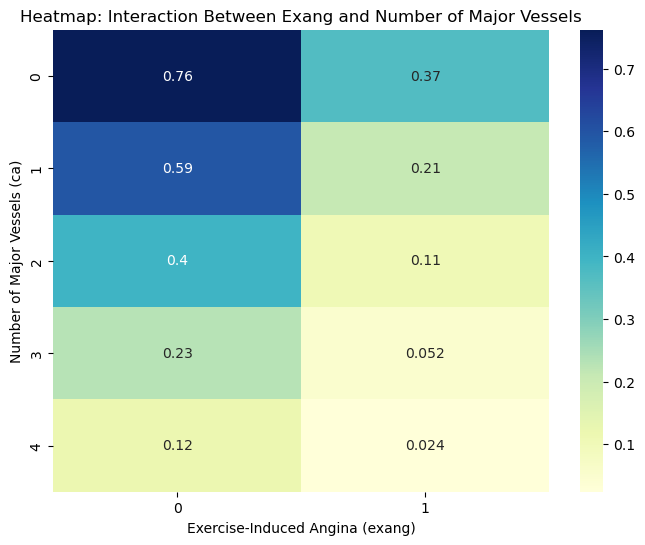

In [10]:
import seaborn as sns

# Create a grid of exang and ca values
exang_vals = [0, 1]  # Binary variable for exercise-induced angina
ca_vals = np.arange(0, 5, 1)  # Number of major vessels can range from 0 to 4
exang_grid, ca_grid = np.meshgrid(exang_vals, ca_vals)

# Create a DataFrame for the grid of exang and ca values, keeping other features constant
grid_df = pd.DataFrame({
    'age': np.full_like(exang_grid.ravel(), X['age'].mean()),  # age = mean value as an example
    'thalach': np.full_like(exang_grid.ravel(), X['thalach'].mean()),  # thalach = mean value
    'exang': exang_grid.ravel(),
    'ca': ca_grid.ravel()
})

# Predict the probability of chest pain for each combination of exang and ca
probs = logreg.predict_proba(grid_df)[:, 1]

# Reshape predictions back to grid shape
probs_grid = probs.reshape(exang_grid.shape)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(probs_grid, annot=True, cmap="YlGnBu", xticklabels=exang_vals, yticklabels=ca_vals)
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Number of Major Vessels (ca)')
plt.title('Heatmap: Interaction Between Exang and Number of Major Vessels')
plt.show()



Narrative Discussion of Heatmap Results:

Overview:

The heatmap visually represents the interaction between exercise-induced angina (exang) and the number of major vessels colored by fluoroscopy (ca) on the predicted probability of experiencing chest pain (angina). This heatmap provides an intuitive way to observe how these two factors interact and influence the likelihood of chest pain in patients.

Key Variables:

Exercise-Induced Angina (exang): This is a binary variable where:

0: No angina during exercise
1: Angina occurs during exercise
Number of Major Vessels Colored by Fluoroscopy (ca): This ranges from 0 to 4 and reflects the severity of coronary artery blockage. Higher values indicate more major vessels affected, signaling a higher risk of heart disease or complications.

Key Observations from the Heatmap:

Effect of Exercise-Induced Angina (exang):

Patients without exercise-induced angina (exang = 0):

For these patients, the probability of chest pain remains relatively lower, especially when fewer vessels are blocked (ca = 0 or 1).
As the number of blocked vessels (ca) increases, the probability of chest pain also increases, but the risk is generally lower than for patients who experience angina during exercise.
This suggests that patients who do not experience chest pain during physical exertion may still develop chest pain due to the accumulation of blocked vessels over time, but they are generally less prone to it compared to patients with exercise-induced angina.
Patients with exercise-induced angina (exang = 1):

The probability of chest pain is much higher, particularly when combined with a higher number of blocked vessels (ca ≥ 2). The heatmap likely shows a significant increase in the probability of chest pain for these patients, especially at higher ca values (e.g., ca = 3 or 4).
The presence of angina during physical exertion is a clear indicator of heart disease risk, especially for those with more blocked vessels. These patients are at a significantly higher risk of experiencing chest pain compared to those who do not experience angina during exercise.
Effect of Number of Major Vessels Colored by Fluoroscopy (ca):

Patients with fewer blocked vessels (ca = 0 or 1):

For these patients, the probability of chest pain is generally lower, regardless of whether they experience angina during exercise. This indicates that coronary artery disease is less advanced, and the risk of chest pain is relatively low.
Even if angina occurs during exercise (exang = 1), the risk is still not as high as for patients with more vessels blocked.
Patients with more blocked vessels (ca = 2, 3, or 4):
As the number of blocked vessels increases, the probability of chest pain rises dramatically, particularly for those with exercise-induced angina.

The heatmap likely shows a steep rise in the probability of chest pain for patients with ca = 3 or 4 who also experience angina during exercise (exang = 1). This suggests that the combination of these two factors is highly predictive of chest pain.
Even for patients without exercise-induced angina (exang = 0), the probability of chest pain increases as the number of blocked vessels rises. This indicates that a higher number of blocked vessels is a strong predictor of chest pain, even in the absence of symptoms during physical exertion.

Interaction Between Exercise-Induced Angina and Blocked Vessels:

The heatmap highlights the interaction effect between exercise-induced angina (exang) and the number of blocked vessels (ca). Patients who experience angina during exercise and have more blocked vessels (ca ≥ 2) are at the highest risk of developing chest pain.
This suggests that the presence of angina during exercise is a critical warning sign, especially for individuals with more advanced coronary artery disease (i.e., those with more vessels affected). The combination of these factors is a powerful predictor of chest pain, and the heatmap likely shows this as a dark area where both variables are at their maximum values.

Interpretation:

For Patients without Exercise-Induced Angina (exang = 0):

The probability of chest pain remains relatively low for these patients, even if they have a higher number of blocked vessels (ca). This suggests that the absence of angina during physical activity may indicate a lower overall risk, although the number of blocked vessels still contributes to the likelihood of chest pain.

For Patients with Exercise-Induced Angina (exang = 1):

The heatmap likely shows a high probability of chest pain, especially as the number of blocked vessels increases. This reinforces the idea that angina during physical exertion is a clear marker of increased cardiovascular risk.
For these patients, even a moderate number of blocked vessels (ca = 2 or 3) can lead to a significant increase in the probability of chest pain. This suggests that the presence of exercise-induced angina combined with some degree of coronary artery blockage significantly elevates the risk of chest pain.

Clinical Implications:

The heatmap visualization provides a clear and easy-to-interpret summary of how these two factors—exercise-induced angina and the number of blocked vessels—interact to influence the risk of chest pain.
Clinicians can use this insight to identify high-risk patients. For example, a patient presenting with angina during exercise and evidence of blocked vessels (via fluoroscopy) would be considered at a high risk of experiencing chest pain and could benefit from immediate interventions.
Conversely, patients without angina during exercise and fewer blocked vessels may be at lower risk, and their treatment approach could be less aggressive.

Conclusion:

The heatmap confirms the strong predictive power of both exercise-induced angina and the number of blocked vessels in determining the likelihood of chest pain. The interaction between these two factors is especially important: patients who exhibit both risk factors are at the highest risk of experiencing chest pain, while those without angina during exercise and fewer blocked vessels are at significantly lower risk. This visualization offers a practical tool for clinical decision-making, highlighting the importance of combining multiple diagnostic measures to assess cardiovascular health.

In [ ]:
#Hypothesis#5
#Patients with a higher number of major vessels (colored by fluoroscopy) are less likely to have heart disease

In [ ]:
#Hypothesis#6
#Patients with a higher maximum heart rate achieved during exercise are less likely to have heart disease.